# BEE 4750 Homework 3: Dissolved Oxygen and Monte Carlo

**Name**: Ava Slade, Romir Anand, Lily Blyn

**ID**: aes372, ra493, llb229

> **Due Date**
>
> Thursday, 10/03/23, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to implement a model for dissolved oxygen in a
    river with multiple waste releases and use this to develop a
    strategy to ensure regulatory compliance.
-   Problem 2 asks you to use Monte Carlo simulation to assess how well
    your strategy from Problem 1 performs under uncertainty.
-   Problem 3 (5750 only) asks you to identify where a third discharge
    should be placed to maintain regulatory compliance.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [43]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/bee4750/hw3-tile-city`


In [44]:
using Random
using Plots
using LaTeXStrings
using Distributions
using CSV
using DataFrames
using Statistics

## Problems (Total: 50/60 Points)

### Problem 1 (30 points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart. The oxygen reaeration rate is 0.55
day<sup>-1</sup>, and the decay rates of CBOD and NBOD are are 0.35 and
0.25 day<sup>-1</sup>, respectively. The river’s saturated dissolved
oxygen concentration is 10m g/L.

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

| Parameter | River Inflow | Waste Stream 1 | Waste Stream 2 |
|:--:|---:|---:|---:|
| Inflow | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration | 7.5 mg/L | 5 mg/L | 5 mg/L |
| CBOD | 5 mg/L | 50 mg/L | 45 mg/L |
| NBOD | 5 mg/L | 35 mg/L | 35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

**In this problem**:

-   Plot the dissolved oxygen concentration from the first waste stream
    to 50m downriver. What is the minimum value in mg/L?
-   What is the minimum level of treatment (% removal of organic waste)
    for waste stream 1 that will ensure that the dissolved oxygen
    concentration never drops below 4 mg/L, assuming that waste stream 2
    remains untreated? How about if only waste stream 2 is treated?
-   Suppose you are responsible for designing a waste treatment plan for
    discharges into the river, with a regulatory mandate to keep the
    dissolved oxygen concentration above 4 mg/L. Discuss whether you’d
    opt to treat waste stream 2 alone or both waste streams equally.
    What other information might you need to make a conclusion, if any?

### Deriving the Model:

U is river velocity in km/d
x is distance downstream from waste release site in km
C(x) is DO concentration at x in mg/L

$$ U\frac{dC}{dx} = Change in DO = Reaeration + Photosynthesis - Respiration - Benthal Uptake - CBOD - NBOD $$

Deoxygenation from waste decomposition is first order (rate k):

Mass balance to determine the concentration at the first mixing point:

$$ \frac{dm}{dt} = \sum \text{m}_{\text{in}} - \sum \text{m}_{\text{out}} + \text{rxn} $$

Assuming steady state $ (\frac{dm}{dt} = 0) $ instantenous mixing $(\text{rxn} = 0)$ the above equation becomes:

$$ \sum \text{m}_{\text{in}}  = \sum \text{m}_{\text{out}} $$

Substitute concentrations and flow rates into this equation $ (Mass = QC) $

$$ \text{Q}_{\text{River Inflow}}*\text{C}_{\text{River Inflow}}  + \text{Q}_{\text{Point 1}}*\text{C}_{\text{Point 1}} = (\text{Q}_{\text{River Inflow}}+\text{Q}_{\text{Point 1}}) *\text{C}_{\text{Mixed}} $$

Concentrations of DO, CBOD, and NBOD in the river at waste point 1 after mixing:

$$ \text{Q}_{\text{River Inflow}}*\text{DO}_{\text{River Inflow}}  + \text{Q}_{\text{Point 1}}*\text{DO}_{\text{Point 1}} = (\text{Q}_{\text{River Inflow}}+\text{Q}_{\text{Point 1}}) *\text{DO}_{\text{Mixed}} $$

$$ \text{Q}_{\text{River Inflow}}*\text{CBOD}_{\text{River Inflow}}  + \text{Q}_{\text{Point 1}}*\text{CBOD}_{\text{Point 1}} = (\text{Q}_{\text{River Inflow}}+\text{Q}_{\text{Point 1}}) *\text{CBOD}_{\text{Mixed}} $$

$$ \text{Q}_{\text{River Inflow}}*\text{NBOD}_{\text{River Inflow}}  + \text{Q}_{\text{Point 1}}*\text{NBOD}_{\text{Point 1}} = (\text{Q}_{\text{River Inflow}}+\text{Q}_{\text{Point 1}}) *\text{NBOD}_{\text{Mixed}} $$

Solving for the concentrations of DO, CBOD, and NBOD at the outflow from point 1: 

$$  100000 \frac{\text{ m}^3}{\text{day}} * 7.5 \frac{\text{ mg}}{\text{ L}}   + 10000 \frac{\text{ m}^3}{\text{day}} * 5 \frac{\text{ mg}}{\text{ L}} = (100000 \frac{\text{ m}^3}{\text{day}} + 10000 \frac{\text{ m}^3}{\text{day}}) * \text{DO}_{\text{Mixed}} $$

$$ \text{DO}_{\text{Mixed}} = 7.27 \frac{\text{ mg}}{\text{ L}} $$

$$  100000 \frac{\text{ m}^3}{\text{day}} * 5 \frac{\text{ mg}}{\text{ L}}   + 10000 \frac{\text{ m}^3}{\text{day}} * 50 \frac{\text{ mg}}{\text{ L}} = (100000 \frac{\text{ m}^3}{\text{day}} + 10000 \frac{\text{ m}^3}{\text{day}}) * \text{CBOD}_{\text{Mixed}} $$

$$ \text{CBOD}_{\text{Mixed}} = 9.09 \frac{\text{ mg}}{\text{ L}} $$

$$  100000 \frac{\text{ m}^3}{\text{day}} * 5 \frac{\text{ mg}}{\text{ L}}   + 10000 \frac{\text{ m}^3}{\text{day}} * 35 \frac{\text{ mg}}{\text{ L}} = (100000 \frac{\text{ m}^3}{\text{day}} + 10000 \frac{\text{ m}^3}{\text{day}}) * \text{NBOD}_{\text{Mixed}} $$

$$ \text{NBOD}_{\text{Mixed}} = 7.72 \frac{\text{ mg}}{\text{ L}} $$

Now, we can solve for the decays of the concentrations from mixing point 1 to mixing point 2. 

First order decay of CBOD and NBOD at steady state is given by

$$\frac{dC}{dt} = -kC $$

This is a separable differential equation. We can rewrite it and integrate both sides:


$$ \frac{1}{C} \, dC = -k \, dt $$


$$ \int \frac{1}{C} \, dC = \int -k \, dt $$


$$ \ln C = -kt + \text{c} $$

Taking the exponent of both sides, solves for C such that: 

$$ C(t) = C_0 e^{-kt} $$

In the context of this problem, t can be rewritten in terms distance along the river $(x)$ and river velocity $(U)$

$$ C(x) = C_0 e^{-k \frac{x}{U}} $$

where $( C_0 )$ is the initial concentration at $( x = 0)$ and is equal to $\text{C}_{\text{Mixed}}$ calculated previously. 

Applying this general equation to CBOD (B), and NBOD (N): 

$$ B(x) = B_0 e^{-k_c \frac{x}{U}} $$
$$ N(x) = N_0 e^{-k_n \frac{x}{U}} $$

corresponding uptake rates are: 
$$ k_c B(x) = k_c B_0 e^{-k_c \frac{x}{U}} $$
$$ k_n N(x) = k_n N_0 e^{-k_n \frac{x}{U}} $$


Reaeration term: 
$$ k_a(C_s - C)$$

Assume we can neglect P, R , and S_B
Putting it all together: 

$$ U\frac{dC}{dx} = k_a(C_s - C) - k_c B_0 e^{-k_c \frac{x}{U}} - k_n N_0 e^{-k_n \frac{x}{U}} $$

Steady state Streeter Phelps Solution:
$$ C(x) = C_s (1 - a_1) + C_0 a_1 - B_0 a_2 - N_0 a_3 $$

$$ a_1 = e^{- \frac{k_a x}{U}}$$
$$ a_2 = \frac{k_c}{k_a - k_c} [e^{- \frac{k_c x}{U}} - e^{- \frac{k_a x}{U}}] $$
$$ a_3 = \frac{k_n}{k_a - k_n} [e^{- \frac{k_n x}{U}} - e^{- \frac{k_a x}{U}}] $$

In the code below, we solved the above equations for a_1, a_2, a_3, C(x), B(x), and N(x) at x = 15 km to  find the concentrations in the inflow to mixing point 2. 

Then we repeated all of the steps above to calculate the concentrations after instantaneous mixing at point 2 to get a model for the DO concentration at any distance past mix point 2, which is the same as the streeter phelps solution written above.



The minimum value of C is: 3.862756734813686
The maximum value of C is: 7.14500421719941


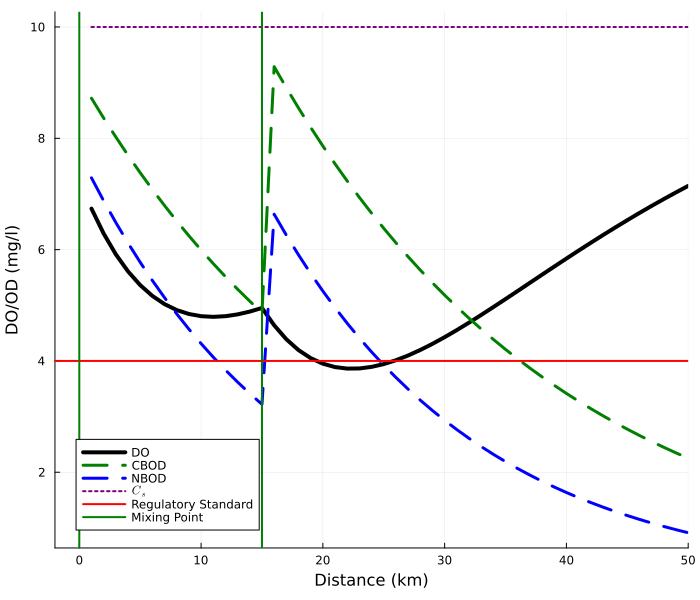

In [45]:
function do_simulate(x, C0, B0, N0, ka, kn, kc, Cs, U)
    B = B0 * exp(-kc * x / U)
    N = N0 * exp(-kn * x / U)
    α1 = exp(-ka * x / U)
    α2 = (kc/(ka-kc)) * (exp.(-kc * x / U) - exp(-ka * x / U))
    α3 = (kn/(ka-kn)) * (exp(-kn * x / U) - exp(-ka * x / U))
    C = Cs * (1 - α1) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return (C, B, N)
end  

# set river properties
ka = 0.55
kc = 0.35
kn = 0.25

C0 = 7.27
B0 = (100000*5+10000*50)/110000
N0 = (100000*5+10000*(35))/110000

Cs = 10
U = 6

x = 1:15

# evaluate model over all x's
# this uses broadcasting
do_out = (y -> do_simulate(y, C0, B0, N0, ka, kc, kn, Cs, U)).(x)

C1 = ([d[1] for d in do_out][15]*110000 + 5*15000)/125000
B1 = ([d[2] for d in do_out][15]*110000 + 45*15000)/125000
N1 = ([d[3] for d in do_out][15]*110000 + 35*15000)/125000
x1 = 1:35

do_out1 = (y -> do_simulate(y, C1, B1, N1, ka, kc, kn, Cs, U)).(x1)

# unpack outputs into individual arrays for C, B, and N
C = vcat([d[1] for d in do_out], [d[1] for d in do_out1])
B = vcat([d[2] for d in do_out], [d[2] for d in do_out1])
N = vcat([d[3] for d in do_out], [d[3] for d in do_out1])
x_full = 1:50

p1 = plot(; ylabel="DO/OD (mg/l)", xlabel="Distance (km)")
plot!(p1, x_full, C, color=:black, linewidth=4, label="DO")
plot!(p1, x_full, B, color=:green, label="CBOD", linestyle=:dash, linewidth=3)
plot!(p1, x_full, N, color=:blue, label="NBOD", linestyle=:dash, linewidth=3)

# plot Cs, which is a constant value
plot!(p1, x_full, Cs * ones(length(x_full)), color=:purple, label=L"C_s", linestyle=:dot, linewidth=2)

# plot regulatory standard
hline!([4], color=:red, linewidth=2, label="Regulatory Standard")
vline!([[0,15]], color=:green, linewidth=2, label="Mixing Point")
#vline!([15], color=:green, linewidth=2, label="Mixing Point")

min_C = minimum(C)
println("The minimum value of C is: ", min_C)
max_C = maximum(C)
println("The maximum value of C is: ", max_C)

# adjust plot size and x-axis
plot!(size=(700, 600))
xaxis!((-2, 50))

The minimum DO value is 3.864 mg/L. This was found in the code using the minimum() function on the concentration values. The maximum DO value is 7.145 mg/L and occurs at 50 km. This was found in the code using maximum() function and is similar to the input DO at 0 km.

To ensure the DO value never drops below 4 mg/L, assuming only waste 1 is treated, the input concentration of CBOD and NBOD in waste 1 must be decreased by 8.7% (8.7% removal of organic waste). 
To ensure the DO value never drops below 4 mg/L, assuming only waste 2 is treated, the input concentration of CBOD in waste 2 must be decreased by 6.8%. This means a 6.8% removal of organic waste. 
The minimum values were found by trial and error. We changed the concentrations of CBOD in the waste streams until the minimum DO concentration was above 4.0 mg/L.

We would opt to treat both waste streams (reducing CBOD in stream 1 to 46 mg/L and to 42 mg/L in stream 2 would achive this) equally since they both contributed to decreasing the dissolved oxygen concentrations. The person upstream shouldn't be allowed to pollute more just because they are located first. Also, with treating both streams equally each polluter would have to treat less than if just one of them treated, so it would be easier for each of them. 

### Problem 2 (20 points)

The simplest climate model involves capturing changes to the Earth’s
energy budget (it is commonly called the *energy balance model*, or
EBM). These changes are also called *radiative forcings* (RF), and can
result from several causes, including greenhouse gas emissions, volcanic
eruptions, and changes to the solar cycle. The EBM treats the Earth as a
0-dimensional sphere covered with water, which absorbs heat in response
to radiative forcings. Chanwith global temperature changes resulting
from imbalances in the average (over the entire surface area) heat flux.

The EBM equations are:

$$
\begin{align*}
\overbrace{\frac{dH}{dt}}^{\text{change in heat}} &= \overbrace{F}^{\substack{\text{radiative} \\ \text{forcing}}} - \overbrace{\lambda T}^{\substack{\text{change in} \\ \text{temperature}}} \\
\underbrace{C}_{\substack{\text{ocean heat} \\ \text{capacity}}} \frac{dT}{dt} &= F - \lambda T \\
c\underbrace{d}_{\substack{\text{ocean} \\ \text{mixing depth}}} \frac{dT}{dt} &= F - \lambda T,
\end{align*}
$$

where $c = 4.184\times 10^6 \mathrm{J/K/m}^2$ is the specific heat of
water per area, $d$ is the depth of the ocean mixed layer (we’ll assume
$d = 86 \mathrm{m}$), and $\lambda$ is the **climate feedback factor**
and controls how much the Earth warms in response to increased radiative
forcing (assume
$\lambda = 2.1^\circ \mathrm{C}/(\mathrm{W}/\mathrm{m}^2$)). The total
radiative forcing $F = F_\text{non-aerosol} + \alpha F_\text{aerosol}$,
where $\alpha$ is an uncertain scaling factor reflecting aerosol-cloud
feedbacks (we’ll assume $\alpha = 0.8$).

The code below loads historical and projected radiative forcings (under
the SSP5-8.5 future emissions scenario, which is the most extreme of the
scenarios used to project climate change impacts) from
`data/ERF_ssp585_1750-2500.csv` into a `DataFrame` object and calculates
the non-aerosol and aerosol components of those forcings.

> **Tip**
>
> Look closely at and experiment with the code below: `DataFrames` are a
> common Julia datatype for tabular data, and you may work more with
> them later in the semester or beyond! They are broadly similar to
> `DataFrames` from `pandas` in Python.

In [46]:
# Dataset from https://zenodo.org/record/3973015
# The CSV is read into a DataFrame object, and we specify that it is comma delimited
forcings_all = CSV.read("data/ERF_ssp585_1750-2500.csv", DataFrame, delim=",")

# Separate out the individual components
# Get total aerosol forcings
forcing_aerosol_rad = forcings_all[!,"aerosol-radiation_interactions"]
forcing_aerosol_cloud = forcings_all[!,"aerosol-cloud_interactions"]
forcing_aerosol = forcing_aerosol_rad + forcing_aerosol_cloud
# Calculate non-aerosol forcings from the total.
forcing_total = forcings_all[!,"total"]
forcing_non_aerosol = forcing_total - forcing_aerosol

751-element Vector{Float64}:
  0.25918289716993287
  0.24176756635599128
  0.21325975144045076
  0.17850291224529793
  0.1457411149414377
  0.09840432796857469
 -0.13383410588305977
  0.01724897551757567
  0.14777213389926366
  0.22712653379357609
  ⋮
 12.638871538651715
 12.636828023749903
 12.634811388909599
 12.632786007467395
 12.630739504290775
 12.628694395288093
 12.626673788131408
 12.624680005793559
 12.623637075242984

We can plot the aerosol and non-aerosol forcings below.

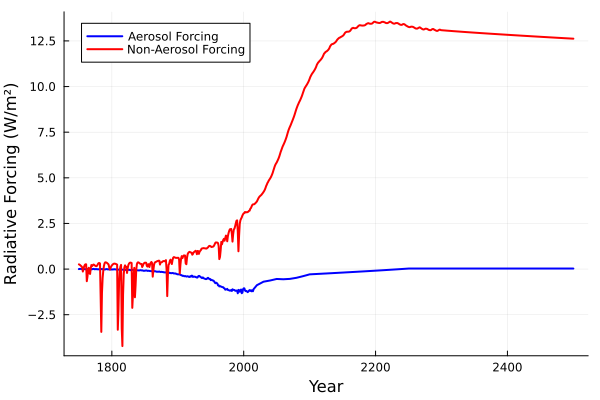

In [47]:
t = Int64.(forcings_all[!,"year"]) # Ensure that years are interpreted as integers
p_forcing = plot(; xlabel="Year", ylabel="Radiative Forcing (W/m²)")
plot!(p_forcing, t, forcing_aerosol, label="Aerosol Forcing", color=:blue, linewidth=2)
plot!(p_forcing, t, forcing_non_aerosol, label="Non-Aerosol Forcing", color=:red, linewidth=2)

**In this problem**:

-   Discretize the EBM to produce a simulation model of global mean
    temperatures $T$ over time as a result of total radiative forcings
    $F$.

-   Simulate global mean temperature anomalies (in $^\circ C$ relative
    to 1750) from your model using the historical and SSP5-8.5 radiative
    forcing data. Use an annual time step for the simulation (in
    seconds: $\Delta t = 31,558,152 \mathrm{s}$). You can assume
    $T(0) = 0^\circ C$. Plot the resulting temperature simulation.

-   The climate feedback factor $\lambda$ is one of the key
    uncertainties in projecting future temperatures, even assuming a
    particular scenario of future radiative forcing. Suppose we use the
    following distribution for $\lambda$,
    $$\lambda \sim \text{LogNormal}(\log(2.1), \log(2)/4).$$

    Use Monte Carlo simulation to estimate the expected temperature in
    2100 assuming SSP5-RCP 8.5 radiative forcings (with 95% confidence
    intervals). How does this estimate compare to the value you got from
    your simulation using the expected value of
    $\lambda=2.1^\circ \mathrm{C}/(\mathrm{W}/\mathrm{m}^2)$? How did
    you decide your sample set was sufficient?

### Discretize the EBM: 
Initial equations:
$$
\begin{align*}
\overbrace{\frac{dH}{dt}}^{\text{change in heat}} &= \overbrace{F}^{\substack{\text{radiative} \\ \text{forcing}}} - \overbrace{\lambda T}^{\substack{\text{change in} \\ \text{temperature}}} \\
\underbrace{C}_{\substack{\text{ocean heat} \\ \text{capacity}}} \frac{dT}{dt} &= F - \lambda T \\
c\underbrace{d}_{\substack{\text{ocean} \\ \text{mixing depth}}} \frac{dT}{dt} &= F - \lambda T,
\end{align*}
$$

Discretizing:

$$
\begin{align*}
{\frac{H(t+1) - H(t)}{\Delta t}} &= {F} - {\lambda T} \\
{C} \frac{T(t+1) - T(t)}{\Delta t} &= F - \lambda T \\
c {d} \frac{T(t+1) - T(t)}{\Delta t} &= F - \lambda T, \\
\end{align*}
$$
Simplified Discretized Model:
$$
\begin{align*}
H(t+1) &= H(t) + {\Delta t} (F - \lambda T) \\
T(t+1) &= \frac{ {\Delta t} (F - \lambda T)}{C} + T(t) \\
T(t+1) &= {\Delta t} \frac{(F - \lambda T)}{cd} + T(t),
\end{align*}
$$

### Code Solution: ###

In the following simulation code, we first created a function `box_simulate_timestep` to compute the increment by which the temperature is updated at each step, which is given by $\frac{(F - \lambda T)}{cd}$. Then we created a function to simulate the entire simulation. To set up, it uses the length of the forcing data as the number of time steps, initializes the array of temperatures with a length of steps+1, and sets the first value in the temperature array to be the intial T value input in the function. Then for each step, it calculates T(t+1), given by the equation: $ T(t+1) = {\Delta t} \frac{(F - \lambda T)}{cd} + T(t) $, where $\frac{(F - \lambda T)}{cd}$ is simply calculated by the `box_simulate_timestep` function. The function returns the array of temperature values, which can then be plotted versus time. 

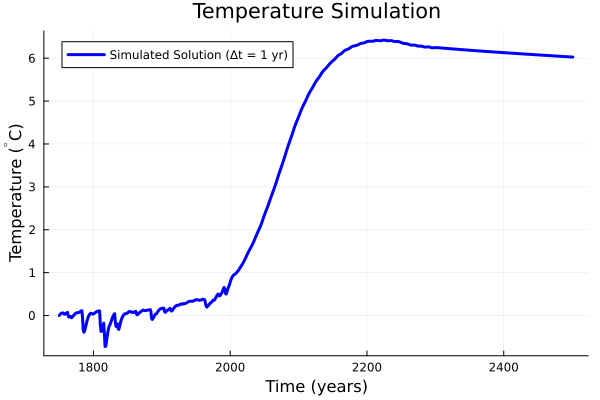

In [48]:
# compute the increment by which the temperature is updated at each step
function box_simulate_timestep(T, F, lambda, c, d)
    return (F - lambda * T)/(c * d)
end

# loop over the timesteps to simulate the concentration series
function simulate(T₀, c, d, lambda, a, F_vec, Δt, end_t)
    # for code simplicity we make the array length T+1 so index 1 is T₀
    steps = end_t
    T = zeros(steps + 1)
    T[1] = T₀
    for t = 1:steps
        T[t+1] = T[t] + Δt * box_simulate_timestep(T[t], F_vec[t], lambda, c, d)
    end
    # the first element of T is the initial condition
    return T
end

T₀ = 0 # deg C
c = 4.184e6 #J/K/m^2
d = 86 # m 
lambda = 2.1 # deg C / (W/m^2)
a = 0.8
F_vec = forcing_non_aerosol + a .* forcing_aerosol # W/m^2
Δt = 31558152 # seconds
end_t = length(F_vec) # years since 1750

T = simulate(T₀, c, d, lambda, a, F_vec, Δt, end_t)

# Plotting
p = plot(; xlabel="Time (years)", ylabel=L"Temperature ($^{\circ}$C)",
title="Temperature Simulation")
# Simulated solution
years = 1750:end_t + 1750
plot!(p, years, T, linewidth=3, color=:blue, label="Simulated Solution (Δt = 1 yr)")

### Part 3 code description: 

To create the monte carlo estimation the LogNormal distribution was used to determine the sampling interval, and then 10,000 random samples were taken within the 95 percent confidence interval. We chose to do 10,000 iterations because it was sufficiently large enough for the temperature estimate to converge. This vector of random samples was looped through and input into the equations defined in the previous part of the question. Instead of looking at the whole time interval of temperature value, for each iteration we just used the temperature value at time=2100. The temperature estimate was calculated after each iteration and plotted. The shaded area shows the 95 percent confidence interval.

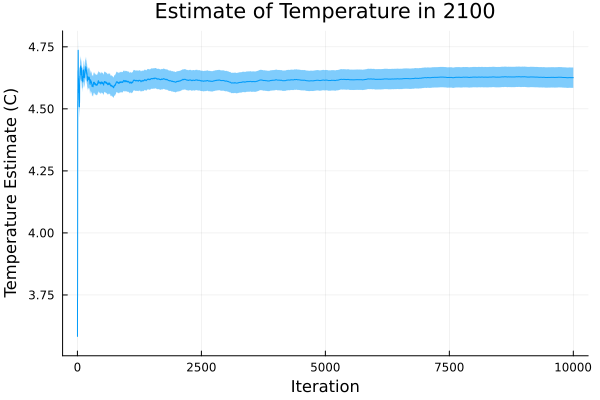

In [49]:
log_dist = (LogNormal(log(2.1),log(2)/4))
lower = quantile(log_dist,0.025)
upper = quantile(log_dist,0.975)
final_dist = truncated(log_dist, lower, upper)
samples = rand(final_dist,10_000)

T₀ = 0 # deg C
c = 4.184e6 #J/K/m^2
d = 86 # m 
a = 0.8
F_vec = forcing_non_aerosol + a .* forcing_aerosol # W/m^2
Δt = 31558152 # seconds
end_t = length(F_vec) # years since 1750

temp=[]
for x in 1:length(samples)
    val=simulate(T₀, c, d, samples[x], a, F_vec, Δt, end_t)[350]
    push!(temp,val)
end

sum = 0
for y in 1:length(temp)
    sum=sum+temp[y]
    temp[y]=sum/y
end

plot(temp)
plt = plot(temp, ribbon=1.96 * std(temp),
    legend = :false, xlabel="Iteration", ylabel="Temperature Estimate (C)", title="Estimate of Temperature in 2100")

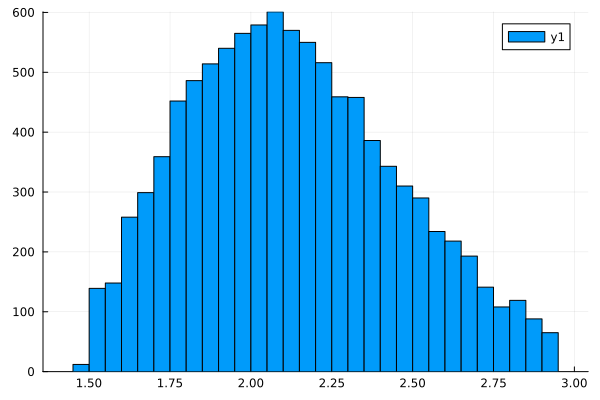

In [50]:
histogram(samples)

### Answers: 

The simulation determined that the temperature in 2100 will be approximately 4.59 degrees celcius. The Monte Carlo estimation at the 10,000th iteration is always just over 4.6 degree celcius. This means that both methods produced the same estimate of approximately 4.6 degrees celsius for the temperature in 2100. We decided the sample set was sufficient since the temperature estimate converges creating a relatively linear graph and there is stable value for the temperature in 2100 after 10,000 iterations.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

**In this problem**:

-   Assume that the treatment plan you identified in Problem 1 is still
    in place for the existing discharges. If the third discharge will
    not be treated, under the original inflow conditions (7.5 mg/L DO),
    how far downstream from the second discharge does this third
    discharge need to be placed to keep the river concentration from
    dropping below 4 mg/L?

## References

List any external references consulted, including classmates.